# Imports

In [391]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
import re
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [445]:
year = 2022
gp_round = 6
ses = 'FP1'

In [446]:
driver_1 = 'VER'
driver_2 = 'LEC'

In [447]:
events_list = ff1.get_event_schedule(2022)[2:]
events_list_2021 = ff1.get_event_schedule(2021)[2:]
country_abbrev = ['BHR','SAU','AUS','ERO','MIA','ESP','MCO','AZE','CAN','GBR','AUT','FRA','HUN','BEL','NLD','ITA','SGP','JPN','USA','MXC','SAO','ABD']
events_list['CountryAbbreviation'] = country_abbrev

In [395]:
events_list_2021

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITALY E DELL’EMILIA ROMAGNA 2021,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16,Practice 2,2021-04-16,Practice 3,2021-04-17,Qualifying,2021-04-17,Race,2021-04-18,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30,Practice 2,2021-04-30,Practice 3,2021-05-01,Qualifying,2021-05-01,Race,2021-05-02,True
4,4,Spain,Montmeló,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07,Practice 2,2021-05-07,Practice 3,2021-05-08,Qualifying,2021-05-08,Race,2021-05-09,True
5,5,Monaco,Monte-Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20,Practice 2,2021-05-20,Practice 3,2021-05-22,Qualifying,2021-05-22,Race,2021-05-23,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04,Practice 2,2021-06-04,Practice 3,2021-06-05,Qualifying,2021-06-05,Race,2021-06-06,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,18,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2021,2021-11-07,Mexico City Grand Prix,conventional,Practice 1,2021-11-05,Practice 2,2021-11-05,Practice 3,2021-11-06,Qualifying,2021-11-06,Race,2021-11-07,True
19,19,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2021,2021-11-14,São Paulo Grand Prix,sprint,Practice 1,2021-11-12,Qualifying,2021-11-12,Practice 2,2021-11-13,Sprint Qualifying,2021-11-13,Race,2021-11-14,True
20,20,Qatar,Al Daayen,FORMULA 1 OOREDOO QATAR GRAND PRIX 2021,2021-11-21,Qatar Grand Prix,conventional,Practice 1,2021-11-19,Practice 2,2021-11-19,Practice 3,2021-11-20,Qualifying,2021-11-20,Race,2021-11-21,True
21,21,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2021,2021-12-05,Saudi Arabian Grand Prix,conventional,Practice 1,2021-12-03,Practice 2,2021-12-03,Practice 3,2021-12-04,Qualifying,2021-12-04,Race,2021-12-05,True


In [448]:
session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Spanish Grand Prix - Practice 1 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '47', '45', '44', '36', '31', '22', '20', '18', '16', '14', '10', '6', '5', '4', '3', '77', '88']


In [444]:
events_list.head(10)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,CountryAbbreviation
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True,BHR
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True,SAU
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True,AUS
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True,ERO
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True,MIA
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True,ESP
8,7,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True,MCO
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True,AZE
10,9,Canada,Montréal,FORMULA 1 GRAND PRIX DU CANADA 2022,2022-06-19 16:00:00,Canadian Grand Prix,conventional,Practice 1,2022-06-17 14:00:00,Practice 2,2022-06-17 17:00:00,Practice 3,2022-06-18 13:00:00,Qualifying,2022-06-18 16:00:00,Race,2022-06-19 14:00:00,True,CAN
11,10,Great Britain,Silverstone,FORMULA 1 BRITISH GRAND PRIX 2022,2022-07-03 17:00:00,British Grand Prix,conventional,Practice 1,2022-07-01 13:00:00,Practice 2,2022-07-01 16:00:00,Practice 3,2022-07-02 12:00:00,Qualifying,2022-07-02 15:00:00,Race,2022-07-03 15:00:00,True,GBR


In [398]:
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race'],
                'sprint': ['Practice 1', 'Qualifying', 'Practice 2', 'Sprint', 'Race']}

In [449]:
results = session.results
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
45,45,N DE VRIES,DEV,Williams,37bedd,Nyck,De Vries,Nyck De Vries,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [400]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-04-10 06:29:39.980,0 days 02:28:39.969000,,NaN,0 days 00:00:00,10861,304,8,100,False,12,interpolation,0.181566,0.000035,OnTrack,-1194,-1333,85
3,2022-04-10 06:29:40.018,0 days 02:28:40.007000,,NaN,0 days 00:00:00.038000,10869,305,8,100,False,12,pos,3.420203,0.000657,OnTrack,-1217,-1312,85
4,2022-04-10 06:29:40.057,0 days 02:28:40.046000,,NaN,0 days 00:00:00.077000,10884,306,8,100,False,12,car,6.747500,0.001296,OnTrack,-1239,-1290,84
5,2022-04-10 06:29:40.199,0 days 02:28:40.188000,,NaN,0 days 00:00:00.219000,10952,307,8,100,False,12,pos,18.891086,0.003629,OnTrack,-1328,-1206,84
6,2022-04-10 06:29:40.337,0 days 02:28:40.326000,,NaN,0 days 00:00:00.357000,11021,308,8,100,False,12,car,30.703056,0.005899,OnTrack,-1450,-1089,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2022-04-10 06:30:59.778,0 days 02:29:59.767000,,NaN,0 days 00:01:19.798000,11600,287,7,100,False,0,car,5166.352500,0.992559,OnTrack,-911,-1602,86
598,2022-04-10 06:30:59.779,0 days 02:29:59.768000,,NaN,0 days 00:01:19.799000,11621,288,7,100,False,0,pos,5166.432675,0.992574,OnTrack,-912,-1602,86
599,2022-04-10 06:31:00.018,0 days 02:30:00.007000,,NaN,0 days 00:01:20.038000,11642,290,7,100,False,0,car,5185.685833,0.996273,OnTrack,-1059,-1462,85
600,2022-04-10 06:31:00.059,0 days 02:30:00.048000,,NaN,0 days 00:01:20.079000,11673,290,7,100,False,0,pos,5188.997055,0.996909,OnTrack,-1085,-1438,85


In [401]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:27.733000,26.0,48.0,1014.5,False,40.6,299,2.9
1,0 days 00:01:27.730000,25.9,48.0,1014.5,False,40.6,284,2.5
2,0 days 00:02:27.732000,25.9,48.0,1014.5,False,40.6,342,2.4
3,0 days 00:03:27.735000,25.9,48.0,1014.5,False,40.7,295,2.4
4,0 days 00:04:27.764000,25.8,48.0,1014.5,False,41.2,289,2.7
...,...,...,...,...,...,...,...,...
151,0 days 02:31:27.982000,27.3,42.0,1014.0,False,34.0,318,1.2
152,0 days 02:32:27.983000,27.2,42.0,1014.0,False,34.0,184,0.8
153,0 days 02:33:27.981000,27.1,41.0,1013.9,False,34.0,285,1.5
154,0 days 02:34:27.983000,27.1,40.0,1014.0,False,33.8,305,1.8


In [402]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [403]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [404]:
lap_1 = fastest_driver_1.telemetry

In [405]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [406]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [407]:
def plot_stacked_data():
    
    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

plot_stacked_data()

In [408]:
def plot_unstacked_data():

    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

    fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

    fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
    fig.update_yaxes(title_text="Gear", row=2, col=1)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
    fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

    fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
    return fig

plot_unstacked_data()

In [409]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaT,NaT,0 days 00:00:29.566000,0 days 00:00:18.608000,0 days 00:00:36.572000,0 days 01:04:12.934000,0 days 01:04:31.542000,0 days 01:05:08.114000,262.0,293.0,280.0,280.0,False,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
6,0 days 01:15:10.407000,16,0 days 00:01:23.957000,7,1,NaT,NaT,0 days 00:00:29.295000,0 days 00:00:18.446000,0 days 00:00:36.216000,0 days 01:14:15.745000,0 days 01:14:34.191000,0 days 01:15:10.407000,263.0,299.0,281.0,280.0,False,MEDIUM,7.0,True,0 days 01:13:46.450000,Ferrari,LEC,1,False,2022-04-10 05:14:46.461
7,0 days 01:16:33.996000,16,0 days 00:01:23.589000,8,1,NaT,NaT,0 days 00:00:29.198000,0 days 00:00:18.450000,0 days 00:00:35.941000,0 days 01:15:39.605000,0 days 01:15:58.055000,0 days 01:16:33.996000,265.0,294.0,282.0,284.0,False,MEDIUM,8.0,True,0 days 01:15:10.407000,Ferrari,LEC,1,True,2022-04-10 05:16:10.418
8,0 days 01:17:57.386000,16,0 days 00:01:23.390000,9,1,NaT,NaT,0 days 00:00:28.887000,0 days 00:00:18.477000,0 days 00:00:36.026000,0 days 01:17:02.883000,0 days 01:17:21.360000,0 days 01:17:57.386000,270.0,297.0,281.0,286.0,False,MEDIUM,9.0,True,0 days 01:16:33.996000,Ferrari,LEC,1,True,2022-04-10 05:17:34.007
9,0 days 01:19:20.746000,16,0 days 00:01:23.360000,10,1,NaT,NaT,0 days 00:00:28.936000,0 days 00:00:18.476000,0 days 00:00:35.948000,0 days 01:18:26.322000,0 days 01:18:44.798000,0 days 01:19:20.746000,272.0,300.0,282.0,283.0,False,MEDIUM,10.0,True,0 days 01:17:57.386000,Ferrari,LEC,1,True,2022-04-10 05:18:57.397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0 days 01:29:48.214000,5,0 days 00:01:25.189000,17,1,NaT,NaT,0 days 00:00:29.513000,0 days 00:00:18.708000,0 days 00:00:36.968000,0 days 01:28:52.538000,0 days 01:29:11.246000,0 days 01:29:48.214000,271.0,300.0,286.0,291.0,True,HARD,18.0,False,0 days 01:28:23.025000,Aston Martin,VET,1,True,2022-04-10 05:29:23.036
1036,0 days 01:31:13.581000,5,0 days 00:01:25.367000,18,1,NaT,NaT,0 days 00:00:29.641000,0 days 00:00:18.758000,0 days 00:00:36.968000,0 days 01:30:17.855000,0 days 01:30:36.613000,0 days 01:31:13.581000,264.0,303.0,286.0,289.0,False,HARD,19.0,False,0 days 01:29:48.214000,Aston Martin,VET,1,True,2022-04-10 05:30:48.225
1037,0 days 01:32:39.084000,5,0 days 00:01:25.503000,19,1,NaT,NaT,0 days 00:00:29.519000,0 days 00:00:18.562000,0 days 00:00:37.422000,0 days 01:31:43.100000,0 days 01:32:01.662000,0 days 01:32:39.084000,273.0,303.0,285.0,290.0,False,HARD,20.0,False,0 days 01:31:13.581000,Aston Martin,VET,1,True,2022-04-10 05:32:13.592
1038,0 days 01:34:04.482000,5,0 days 00:01:25.398000,20,1,NaT,NaT,0 days 00:00:29.553000,0 days 00:00:18.662000,0 days 00:00:37.183000,0 days 01:33:08.637000,0 days 01:33:27.299000,0 days 01:34:04.482000,NaN,300.0,286.0,291.0,False,HARD,21.0,False,0 days 01:32:39.084000,Aston Martin,VET,1,True,2022-04-10 05:33:39.095


In [410]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry
lap_1 = lap_1[lap_1['Source'] != 'pos'].reset_index(drop=True)
lap_2 = lap_2[lap_2['Source'] != 'pos'].reset_index(drop=True)

In [411]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^'],
                   8: [700, 350, '>'],
}

for i in range(1,23):
    if i in start_line_dict:
        continue
    else:
        start_line_dict[i] = [0, 0, '<']
    
start_line_dict

{1: [120, 1280, '^'],
 2: [-1341, 2800, '<'],
 3: [-1228, 100, '<'],
 4: [-1533, -650, '<'],
 5: [2633, 128, '>'],
 6: [25, -469, '<'],
 7: [-8065, -6549, '^'],
 8: [700, 350, '>'],
 9: [0, 0, '<'],
 10: [0, 0, '<'],
 11: [0, 0, '<'],
 12: [0, 0, '<'],
 13: [0, 0, '<'],
 14: [0, 0, '<'],
 15: [0, 0, '<'],
 16: [0, 0, '<'],
 17: [0, 0, '<'],
 18: [0, 0, '<'],
 19: [0, 0, '<'],
 20: [0, 0, '<'],
 21: [0, 0, '<'],
 22: [0, 0, '<']}

In [412]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
pix = 1/plt.rcParams['figure.dpi']

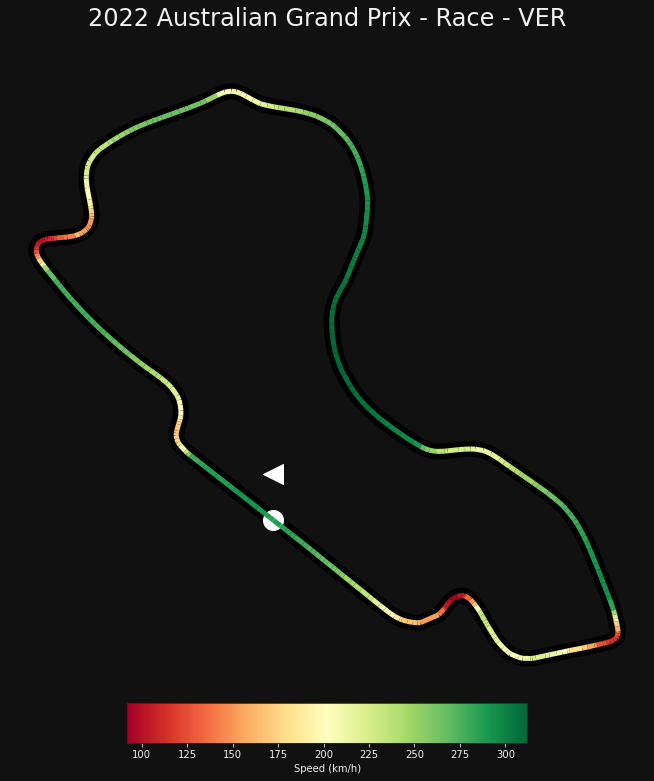

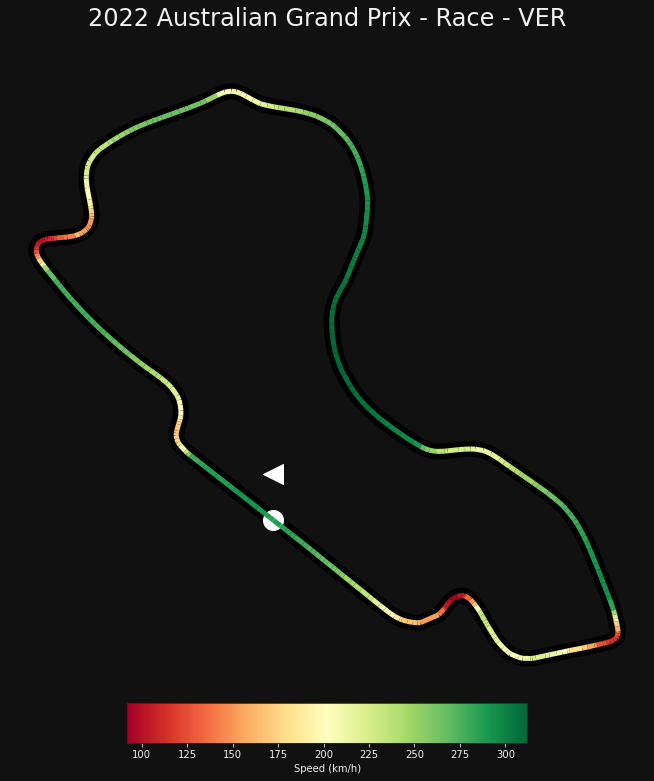

In [413]:
def plot_track_speed():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['Speed'])

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_speed()

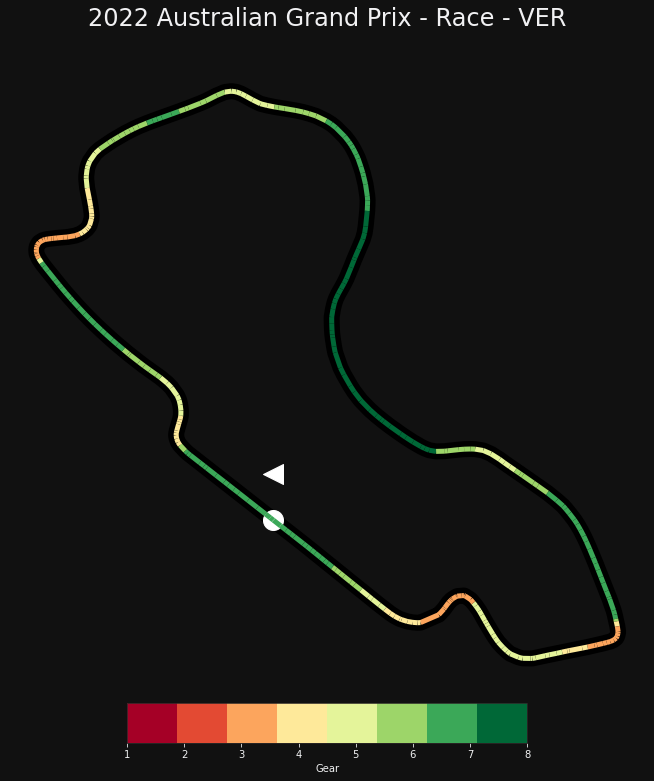

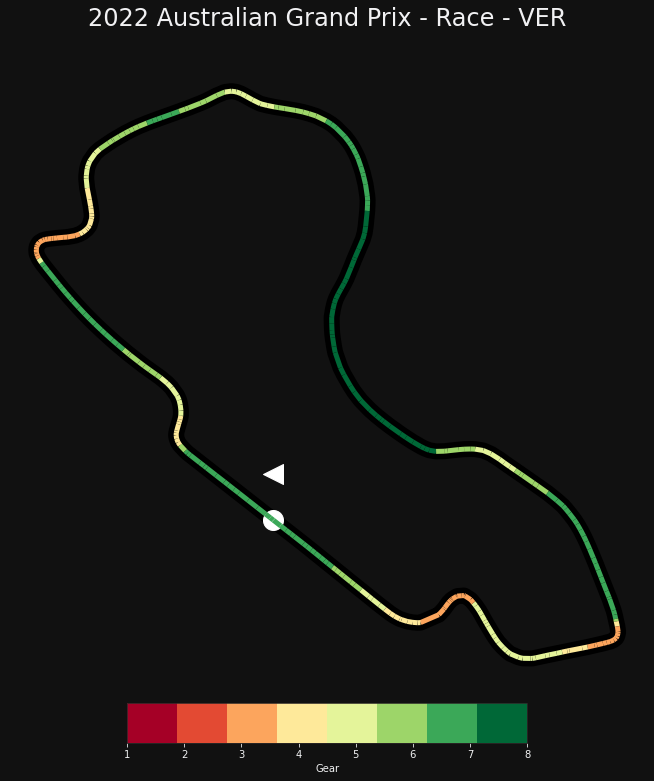

In [414]:
def plot_track_gear():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a norm to map from data points to colors
    norm = plt.Normalize(1, colormap_gear.N+1)
    lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['nGear'].to_numpy().astype(float))

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Create a color bar as a legend
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_gear()

In [415]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

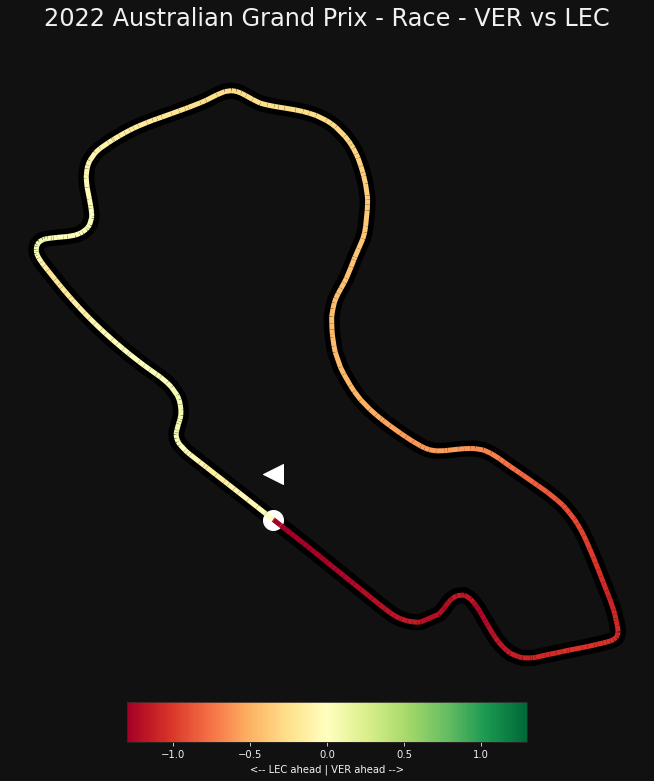

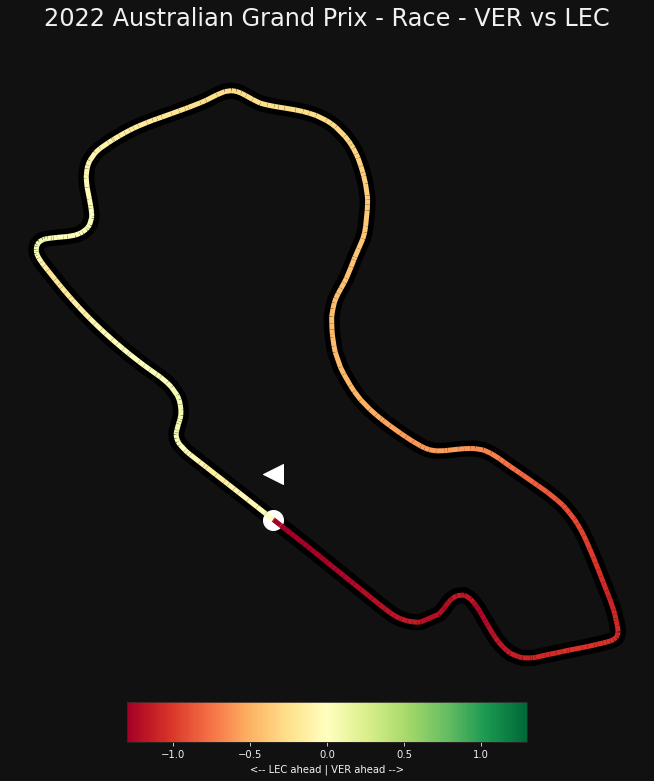

In [416]:
def plot_track_delta():

    # Determine boundaries for the colorbar
    vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(vmin, vmax)
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(delta_time)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_delta()

In [417]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [418]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [419]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [420]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [421]:
df_drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [422]:
def plot_compare_points(df_drivers):
    
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line
    
    driver_1_team_color = '#' + results[results['Abbreviation'] == driver_1]['TeamColor'][0]
    driver_2_team_color = '#' + results[results['Abbreviation'] == driver_2]['TeamColor'][0]
    hovertemplate = 'Points: %{y}'

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color, hovertemplate=hovertemplate))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color, hovertemplate=hovertemplate))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [423]:
plot_compare_points(df_drivers_standings)

In [424]:
round_mapping = {}
for i in events_list.itertuples():
    round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation

df_constructors.columns = df_constructors.columns.map(round_mapping)
df_constructors

,nan,nan,nan,nan,nan,nan,nan
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [425]:
df_constructors_standings = pd.read_csv('../data/constructors_standings.csv', index_col=0)
df_constructors_standings

,1,2,3,4,5,6,7
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [426]:
df_drivers_standings_test = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [427]:
def get_drivers_standings_df():
    
    df = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

def get_constructors_standings_df():
    
    df = pd.read_csv('../data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

In [428]:
get_drivers_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [429]:
get_constructors_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [430]:
def format_results_race(results, session_type):
    
    
    if session_type == 'R' or session_type == 'r' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['FullName','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        
    elif session_type == 'Q' or session_type == 'q':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3
        results_formatted = results_formatted[['Name','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted['Position'] = results_formatted['Position'].astype(int)
            
    return results_formatted  
    

In [431]:
format_results_race(session.results, ses).head(10)

,Name,TeamName,Position,GridPosition,Points,TimeFinish
16,Charles Leclerc,Ferrari,1,1,26,1:27:46.548
11,Sergio Perez,Red Bull Racing,2,3,18,+0:20.524
63,George Russell,Mercedes,3,6,15,+0:25.593
44,Lewis Hamilton,Mercedes,4,5,12,+0:28.543
4,Lando Norris,McLaren,5,4,10,+0:53.303
3,Daniel Ricciardo,McLaren,6,7,8,+0:53.737
31,Esteban Ocon,Alpine,7,8,6,+1:01.683
77,Valtteri Bottas,Alfa Romeo,8,12,4,+1:08.439
10,Pierre Gasly,AlphaTauri,9,11,2,+1:16.221
23,Alexander Albon,Williams,10,20,1,+1:19.382


In [432]:
format_results_race(session.results, ses).tail(10)

,Name,TeamName,Position,GridPosition,Points,TimeFinish
24,Guanyu Zhou,Alfa Romeo,11,14,0,+1:21.695
18,Lance Stroll,Aston Martin,12,19,0,+1:28.598
47,Mick Schumacher,Haas F1 Team,13,15,0,+1 Lap
20,Kevin Magnussen,Haas F1 Team,14,16,0,+1 Lap
22,Yuki Tsunoda,AlphaTauri,15,13,0,+1 Lap
6,Nicholas Latifi,Williams,16,18,0,+1 Lap
14,Fernando Alonso,Alpine,17,10,0,+1 Lap
1,Max Verstappen,Red Bull Racing,18,2,0,DNF
5,Sebastian Vettel,Aston Martin,19,17,0,DNF
55,Carlos Sainz,Ferrari,20,9,0,DNF


In [433]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:27:46.548000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:28:07.072000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,6.0,NaT,NaT,NaT,0 days 01:28:12.141000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,5.0,NaT,NaT,NaT,0 days 01:28:15.091000,Finished,12.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,4.0,NaT,NaT,NaT,0 days 01:28:39.851000,Finished,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,16.0,18.0,NaT,NaT,NaT,NaT,+1 Lap,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,17.0,10.0,NaT,NaT,NaT,NaT,+1 Lap,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,18.0,2.0,NaT,NaT,NaT,NaT,Hydraulics,0.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,19.0,17.0,NaT,NaT,NaT,NaT,Accident,0.0


In [451]:
def add_driver_info(session):
    drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)
    drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    missing_drivers = [x for x in drivers_standings.index.tolist() if x not in drivers_info['Abbreviation'].tolist()]
    if len(missing_drivers) > 0:
        df = session.results.copy().drop(columns=["Position", "GridPosition", "Q1", "Q2", "Q3", "Time", "Status", "Points"])
        for i in missing_drivers:
            df_missing = df[df['Abbreviation'] == i]
            df_full = pd.concat([drivers_info, df_missing])
        df_full.to_csv('../data/drivers_info.csv')
        
add_driver_info(session)

[]


In [452]:




# def champ_pos(drv):

#Récupération des noms et des couleurs à partir d'une course

drv = pd.read_csv('../data/drivers_standings.csv', index_col=0)
drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)


# #Jointure entre les deux dataframe

df_class = drivers_info.merge(drv, how='right', left_on = ['Abbreviation'], right_index = True).reset_index()
df_class

#Modifie le dataframe pour avoir les courses en lignes

nb = len(drv.transpose())+1
df_final = pd.DataFrame(columns=['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName','Points', 'Race'])
for i in range(1,nb):
    df_class_ligne = df_class.loc[:,['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName',str(i)]]
    df_class_ligne['Race'] = i
    df_class_ligne.rename(columns={str(i): 'Points'}, inplace = True)
    df_final = pd.concat([df_final, df_class_ligne])
    
df_final.reset_index(drop = True, inplace = True)


#Ajoute une colonne classement avec la position au championnat à l'issue de chaque course

df_final = df_final.sort_values(by=['Race', 'Points'], ascending = [True, False])
df_final['classement']=len(drv)
longueur = len(df_final)
df_final.iloc[0,10] = 1

for i in range(1,longueur -1):
    if df_final.iloc[i,9] == df_final.iloc[i-1,9]:
        df_final.iloc[i,10] = df_final.iloc[i-1,10] +  1
    else :
        df_final.iloc[i,10] = 1
        
        
# #Génère une course 0 avec le classement cumulé de la dernière (permet de mettre les pilotes dans l'ordre du dernier classement)

df_init = df_final[df_final['Race']==nb-1].copy()
df_init['Race'] = 0
df_init['Points'] = 0

df_final = pd.concat([df_final, df_init])
        
# Paramétrage du dictionnaire des couleurs

colorMap ={}
df_class = pd.DataFrame(df_class)

for i in df_class.itertuples() :
    colorMap[i.Abbreviation] = '#' + i.TeamColor
        
        
#Création du graphique


#def champ_pos(df_final):

df_final = df_final.sort_values(by=['Race', 'classement'], ascending = [True, True])

maxY = df_final['Points'].max() + 20

fig = px.bar(df_final, x="Abbreviation", y="Points",  color = "Abbreviation", color_discrete_map = colorMap, animation_frame="Race", 
            labels=dict(Abbreviation="Name", classement="Ranking", FullName = "Pilot"), width = 1000, height=800, text = df_final['classement'])


fig.update_layout(title_text='Evolution of points in the championship', title_x=0.5, transition = {'duration': 1000}, showlegend = False)

fig.update_traces(textposition='inside', hovertemplate='Points: %{y}' )

fig.update_yaxes(range=[0, maxY])

fig.show()